# Stroke Prediction Model 


In [74]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers.experimental import preprocessing
import seaborn as sns
import numpy as np

## Step 1 : Data Cleaning 
- read raw data from csv file
- remove row that contains unknown value
- transform datatype for certain column from String/object to int64 
- Separate the dataset into train(80%) and test(20%)


In [75]:
# read raw data
dataset = pd.read_csv('E:\Personal Project\Stroke Prediction Dataset\Dataset\healthcare-dataset-stroke-data.csv', encoding='utf-8')
            #usecols=['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke'])


Text(0, 0.5, 'Frequency')

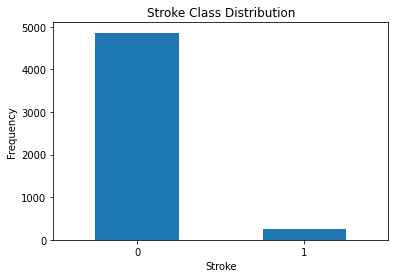

In [76]:
# explore the dataset and check the balance of dataset
count_class = pd.value_counts(dataset['stroke'], sort=True)
count_class.plot(kind='bar', rot=0)
plt.title('Stroke Class Distribution')
plt.xlabel('Stroke')
plt.ylabel('Frequency')

In [77]:
stroke = dataset[dataset['stroke']==1]
non_stroke = dataset[dataset['stroke']==0]
print(stroke.shape, non_stroke.shape)

(249, 12) (4861, 12)


In [78]:
# remove row that contains unknown values
print(f'Original dataset size : {dataset.shape}')
dataset = dataset.dropna()
print(f'New dataset size : {dataset.shape}')
dataset.tail()

Original dataset size : (5110, 12)
New dataset size : (4909, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [79]:
dataset.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [80]:
# transform datatype for certain column from String/object to int64
dataset['gender'] = dataset['gender'].replace({'Male':0, 'Female': 1, 'Other': 2})
dataset['ever_married'] = dataset['ever_married'].map({'No': 0, 'Yes': 1})
dataset['work_type'] = dataset['work_type'].map({"Never_worked": 0, "children": 1, "Govt_job": 2, "Private": 3, "Self-employed": 4})
dataset['Residence_type'] = dataset['Residence_type'].map({'Rural': 0, 'Urban': 1})
dataset['smoking_status'] = dataset['smoking_status'].map({"never smoked": 0, "formerly smoked": 1, "smokes": 2, "Unknown": 3})
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,1,3,1,228.69,36.6,1,1
2,31112,0,80.0,0,1,1,3,0,105.92,32.5,0,1
3,60182,1,49.0,0,0,1,3,1,171.23,34.4,2,1
4,1665,1,79.0,1,0,1,4,0,174.12,24.0,0,1
5,56669,0,81.0,0,0,1,3,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,1,13.0,0,0,0,1,0,103.08,18.6,3,0
5106,44873,1,81.0,0,0,1,4,1,125.20,40.0,0,0
5107,19723,1,35.0,0,0,1,4,0,82.99,30.6,0,0
5108,37544,0,51.0,0,0,1,3,0,166.29,25.6,1,0


In [81]:
dataset.pop('id')

0        9046
2       31112
3       60182
4        1665
5       56669
        ...  
5104    14180
5106    44873
5107    19723
5108    37544
5109    44679
Name: id, Length: 4909, dtype: int64

In [82]:
dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,3,1,228.69,36.6,1,1
2,0,80.0,0,1,1,3,0,105.92,32.5,0,1
3,1,49.0,0,0,1,3,1,171.23,34.4,2,1
4,1,79.0,1,0,1,4,0,174.12,24.0,0,1
5,0,81.0,0,0,1,3,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,1,13.0,0,0,0,1,0,103.08,18.6,3,0
5106,1,81.0,0,0,1,4,1,125.20,40.0,0,0
5107,1,35.0,0,0,1,4,0,82.99,30.6,0,0
5108,0,51.0,0,0,1,3,0,166.29,25.6,1,0


In [83]:
features = dataset.copy()
labels = dataset.pop('stroke')
features

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,3,1,228.69,36.6,1,1
2,0,80.0,0,1,1,3,0,105.92,32.5,0,1
3,1,49.0,0,0,1,3,1,171.23,34.4,2,1
4,1,79.0,1,0,1,4,0,174.12,24.0,0,1
5,0,81.0,0,0,1,3,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,1,13.0,0,0,0,1,0,103.08,18.6,3,0
5106,1,81.0,0,0,1,4,1,125.20,40.0,0,0
5107,1,35.0,0,0,1,4,0,82.99,30.6,0,0
5108,0,51.0,0,0,1,3,0,166.29,25.6,1,0


In [84]:
from imblearn.under_sampling import NearMiss
nm = NearMiss(version=1)
features, labels = nm.fit_resample(features, labels)

In [85]:
features

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,80.0,0,0,1,4,0,72.61,27.6,0,0
1,1,79.0,0,0,1,3,1,68.37,24.2,2,0
2,1,80.0,0,0,1,3,0,71.88,26.7,0,0
3,1,79.0,0,1,1,4,1,67.84,25.2,2,0
4,1,80.0,0,0,1,3,1,73.89,26.7,1,0
...,...,...,...,...,...,...,...,...,...,...,...
413,1,68.0,1,1,1,3,1,247.51,40.5,1,1
414,0,57.0,0,0,1,3,0,84.96,36.7,3,1
415,1,14.0,0,0,0,1,0,57.93,30.9,3,1
416,1,75.0,0,0,1,4,0,78.80,29.3,1,1


In [86]:
# Separate the dataset into train(80%) and test(20%)
train_dataset = features.sample(frac=0.8, random_state=0)
test_dataset = features.drop(train_dataset.index)

# inspect the dataset
sns.pairplot(train_dataset, diag_kind='kde')

In [87]:
# overall statistics
train_dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
360,0,63.0,0,0,1,3,0,137.30,31.7,1,1
170,1,52.0,0,0,1,3,1,99.10,29.1,3,0
224,1,60.0,0,0,0,3,1,89.22,37.8,0,1
358,1,32.0,0,0,1,3,0,76.13,29.9,2,1
309,1,77.0,0,0,1,3,1,105.22,31.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
48,1,80.0,1,0,1,3,1,90.77,26.0,0,0
207,1,76.0,0,0,1,2,1,96.29,25.4,2,0
279,1,70.0,0,1,1,3,0,59.35,32.3,1,1
227,1,79.0,0,0,1,4,1,228.70,26.6,0,1


In [88]:
# separate the train and test into its features and labels repectively
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('stroke')
test_labels = test_features.pop('stroke')



In [89]:
print(train_features.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')


## Step 2: Model development
- initialize normalizer
- initialize Machine Learning Model
- Train/Fit the ML Model

In [90]:
# initialize normalizer
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))

In [91]:
# initialize Machine Learning Model
model = tf.keras.Sequential()
#model.add(normalizer)
model.add(layers.Dense(8, activation='relu',  input_shape=(10, )))
model.add(layers.Dense(9, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_10 (Dense)             (None, 9)                 81        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 10        
Total params: 179
Trainable params: 179
Non-trainable params: 0
_________________________________________________________________


In [92]:
# Complie the model with optimizer and loss function
model.compile(loss='binary_crossentropy', optimizer=tf.optimizers.RMSprop(0.01), metrics=['accuracy'])

In [93]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Find the best model
callback_a = ModelCheckpoint(filepath='my_best_model.hdf5', monitor='val_loss', save_best_only=True, save_weights_only=True)
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=20, verbose=1)

In [94]:
# Train/Fit the ANN Model
history = model.fit(train_features,train_labels, epochs=256, validation_data=(test_features, test_labels), batch_size=10, callbacks=[callback_a, callback_b])

Epoch 1/256
34/34 [==============================] - 1s 6ms/step - loss: 2.7499 - accuracy: 0.5445 - val_loss: 0.6859 - val_accuracy: 0.6667
Epoch 2/256
34/34 [==============================] - 0s 2ms/step - loss: 0.9168 - accuracy: 0.5633 - val_loss: 0.9088 - val_accuracy: 0.5238
Epoch 3/256
34/34 [==============================] - 0s 2ms/step - loss: 0.8239 - accuracy: 0.5188 - val_loss: 0.7850 - val_accuracy: 0.5595
Epoch 4/256
34/34 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.6417 - val_loss: 0.6686 - val_accuracy: 0.4762
Epoch 5/256
34/34 [==============================] - 0s 2ms/step - loss: 0.6640 - accuracy: 0.6241 - val_loss: 0.9785 - val_accuracy: 0.5714
Epoch 6/256
34/34 [==============================] - 0s 2ms/step - loss: 0.7764 - accuracy: 0.5795 - val_loss: 0.6050 - val_accuracy: 0.6786
Epoch 7/256
34/34 [==============================] - 0s 2ms/step - loss: 0.6571 - accuracy: 0.6449 - val_loss: 0.6615 - val_accuracy: 0.6310
Epoch 8/256
3

# Step 3 : Visualization and Evaluation

In [95]:
print(history.params)

{'verbose': 1, 'epochs': 256, 'steps': 34}


In [96]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
27,0.636562,0.640719,0.690099,0.547619,27
28,0.647682,0.619760,0.612682,0.678571,28
29,0.641432,0.640719,0.600127,0.666667,29
30,0.627719,0.634731,0.668963,0.630952,30
31,0.631259,0.637725,0.671143,0.571429,31


In [97]:
test_loss, test_acc = model.evaluate(test_features, test_labels)
print('\nTest accuracy:', test_acc)

3/3 [==============================] - 0s 2ms/step - loss: 0.6711 - accuracy: 0.5714

Test accuracy: 0.5714285969734192


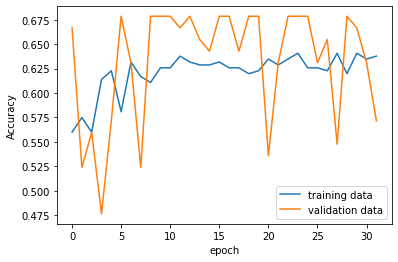

In [98]:
# plot learning curve
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [99]:
plt.scatter(y_pred, test_labels)

NameError: name 'y_pred' is not defined

# Step 4: Hyperparameter tuning

In [100]:
import kerastuner as kt

In [101]:
def model_builder(hp):
    model = keras.Sequential()
    #model.add(normalizer)
    model.add(layers.Dense(8, activation='relu',  input_shape=(10, )))
    
    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 32-512
    hp_units = hp.Int('units', min_value=2, max_value=10, step=1)
    model.add(keras.layers.Dense(units=hp_units, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-1, 1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=hp_learning_rate),
                    loss=keras.losses.BinaryCrossentropy(),
                    metrics=['accuracy'])

    return model

In [102]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=50,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

INFO:tensorflow:Reloading Oracle from existing project my_dir\intro_to_kt\oracle.json
INFO:tensorflow:Reloading Tuner from my_dir\intro_to_kt\tuner0.json


In [103]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [104]:
tuner.search(train_features, train_labels, epochs=50, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 9 and the optimal learning rate for the optimizer
is 0.01.



In [105]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_features, train_labels, epochs=50, validation_split=0.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/50
9/9 [==============================] - 1s 24ms/step - loss: 12.1209 - accuracy: 0.4827 - val_loss: 1.8364 - val_accuracy: 0.4776
Epoch 2/50
9/9 [==============================] - 0s 7ms/step - loss: 1.1366 - accuracy: 0.4746 - val_loss: 0.7448 - val_accuracy: 0.4328
Epoch 3/50
9/9 [==============================] - 0s 7ms/step - loss: 0.8202 - accuracy: 0.4551 - val_loss: 0.7954 - val_accuracy: 0.5373
Epoch 4/50
9/9 [==============================] - 0s 7ms/step - loss: 0.7238 - accuracy: 0.6205 - val_loss: 1.0073 - val_accuracy: 0.4925
Epoch 5/50
9/9 [==============================] - 0s 7ms/step - loss: 0.7723 - accuracy: 0.6119 - val_loss: 0.6498 - val_accuracy: 0.6119
Epoch 6/50
9/9 [==============================] - 0s 7ms/step - loss: 0.6227 - accuracy: 0.6640 - val_loss: 0.8009 - val_accuracy: 0.5373
Epoch 7/50
9/9 [==============================] - 0s 7ms/step - loss: 0.8083 - accuracy: 0.5095 - val_loss: 0.6543 - val_accuracy: 0.6716
Epoch 8/50
9/9 [================

In [106]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(train_features, train_labels, epochs=best_epoch, validation_split=0.2)

Epoch 1/13
9/9 [==============================] - 1s 24ms/step - loss: 6.4675 - accuracy: 0.4614 - val_loss: 3.5864 - val_accuracy: 0.5373
Epoch 2/13
9/9 [==============================] - 0s 7ms/step - loss: 3.0020 - accuracy: 0.4981 - val_loss: 4.4980 - val_accuracy: 0.5373
Epoch 3/13
9/9 [==============================] - 0s 7ms/step - loss: 2.2740 - accuracy: 0.6029 - val_loss: 2.1952 - val_accuracy: 0.5522
Epoch 4/13
9/9 [==============================] - 0s 8ms/step - loss: 2.7063 - accuracy: 0.5215 - val_loss: 6.3735 - val_accuracy: 0.4627
Epoch 5/13
9/9 [==============================] - 0s 7ms/step - loss: 2.8240 - accuracy: 0.5213 - val_loss: 1.0545 - val_accuracy: 0.5373
Epoch 6/13
9/9 [==============================] - 0s 7ms/step - loss: 1.2711 - accuracy: 0.5650 - val_loss: 2.9722 - val_accuracy: 0.5373
Epoch 7/13
9/9 [==============================] - 0s 8ms/step - loss: 2.2869 - accuracy: 0.5109 - val_loss: 0.9225 - val_accuracy: 0.6119
Epoch 8/13
9/9 [=================

In [107]:
eval_result = hypermodel.evaluate(test_features, test_labels)
print("[test loss, test accuracy]:", eval_result)

3/3 [==============================] - 0s 1ms/step - loss: 2.2152 - accuracy: 0.4762
[test loss, test accuracy]: [2.215175151824951, 0.4761904776096344]


# Step 5: Save Neural Network Model

In [108]:
import tensorflowjs as tfjs

In [109]:
tfjs.converters.save_keras_model(hypermodel, 'stroke_prediction_model')